# 1. Cargar la data

In [1]:
import pandas as pd
Credit = pd.read_excel('creditos_bancarios.xlsx', sheet_name='SouthGermanCredit') 
CreditDesc = Credit.describe()

Revisar Balance y cantidad

# 2. Limpiar la data

La varible "purpose" no sigue la lógica de riesgo, se tratará cada concepto como una variable binaria.

In [2]:
Credit_0 = pd.get_dummies(Credit,columns=['purpose'])
Credit_0Desc = Credit_0.describe()



Separación de Variable Dependiente e Independientes

In [3]:
Y=Credit_0["credit_risk"]
Xs=Credit_0.drop('credit_risk',axis=1)
Xs


status  duration  credit_history  amount  savings  employment_duration  \
0         1        18               4    1049        1                    2   
1         1         9               4    2799        1                    3   
2         2        12               2     841        2                    4   
3         1        12               4    2122        1                    3   
4         1        12               4    2171        1                    3   
..      ...       ...             ...     ...      ...                  ...   
995       1        24               2    1987        1                    3   
996       1        24               2    2303        1                    5   
997       4        21               4   12680        5                    5   
998       2        12               2    6468        5                    1   
999       1        30               2    6350        5                    5   

     installment_rate  personal_status_sex  other_debtors  present_residence  \
0                   4                    2              1                  4   
1                   2                    3              1                  2   
2                   2                    2              1                  4   
3                   3                    3              1                  2   
4                   4                    3              1                  4   
..                ...                  ...            ...                ...   
995                 2                    3              1                  4   
996                 4                    3              2                  1   
997                 4                    3              1                  4   
998                 2                    3              1                  1   
999                 4                    3              1                  4   

     ...  purpose_0  purpose_1  purpose_2  purpose_3  purpose_4  purpose_5  \
0    ...          0          0          1          0          0          0   
1    ...          1          0          0          0          0          0   
2    ...          0          0          0          0          0          0   
3    ...          1          0          0          0          0          0   
4    ...          1          0          0          0          0          0   
..   ...        ...        ...        ...        ...        ...        ...   
995  ...          0          0          0          1          0          0   
996  ...          1          0          0          0          0          0   
997  ...          1          0          0          0          0          0   
998  ...          0          0          0          1          0          0   
999  ...          0          0          1          0          0          0   

     purpose_6  purpose_8  purpose_9  purpose_10  
0            0          0          0           0  
1            0          0          0           0  
2            0          0          1           0  
3            0          0          0           0  
4            0          0          0           0  
..         ...        ...        ...         ...  
995          0          0          0           0  
996          0          0          0           0  
997          0          0          0           0  
998          0          0          0           0  
999          0          0          0           0  

[1000 rows x 29 columns]

# 3. Separar training y testing

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xs, Y, test_size=0.30, 
random_state=42)

# 4. Escalamos

In [5]:
from sklearn.preprocessing import StandardScaler  #importamos la lib
scaler = StandardScaler()  #creamos el objeto que escalará la data
scaler.fit(X_train)  #este paso calculará la info necesaria para la normalización 
# (media y desviación std de cada columna), pero todavía no la escalará
# ahora puedo escalar ocupando el comando Transform:
X_train_std=scaler.transform(X_train)
#puede ser buena idea llevarlo a DataFrame:
X_train_std=pd.DataFrame(data=X_train_std,columns=X_train.columns,index=X_train.index)
X_train_std.describe()


status      duration  credit_history        amount       savings  \
count  7.000000e+02  7.000000e+02    7.000000e+02  7.000000e+02  7.000000e+02   
mean  -4.567775e-17 -9.135549e-17    7.105427e-17 -3.298948e-17  1.522592e-17   
std    1.000715e+00  1.000715e+00    1.000715e+00  1.000715e+00  1.000715e+00   
min   -1.261703e+00 -1.426801e+00   -2.367239e+00 -1.076147e+00 -6.862418e-01   
25%   -1.261703e+00 -7.673355e-01   -5.095402e-01 -6.975303e-01 -6.862418e-01   
50%   -4.667505e-01 -2.727362e-01   -5.095402e-01 -3.498532e-01 -6.862418e-01   
75%    1.123154e+00  2.630797e-01    1.348158e+00  3.158869e-01  5.828976e-01   
max    1.123154e+00  4.178658e+00    1.348158e+00  5.340983e+00  1.852037e+00   

       employment_duration  installment_rate  personal_status_sex  \
count         7.000000e+02      7.000000e+02         7.000000e+02   
mean          1.091191e-16     -1.877863e-16        -1.522592e-17   
std           1.000715e+00      1.000715e+00         1.000715e+00   
min          -1.955480e+00     -1.802791e+00        -2.351788e+00   
25%          -3.122195e-01     -8.968659e-01        -9.483339e-01   
50%          -3.122195e-01      9.059252e-03         4.551201e-01   
75%           1.331041e+00      9.149844e-01         4.551201e-01   
max           1.331041e+00      9.149844e-01         1.858574e+00   

       other_debtors  present_residence  ...     purpose_0     purpose_1  \
count   7.000000e+02       7.000000e+02  ...  7.000000e+02  7.000000e+02   
mean   -2.461523e-16       9.008667e-17  ... -2.283887e-17 -2.410770e-17   
std     1.000715e+00       1.000715e+00  ...  1.000715e+00  1.000715e+00   
min    -2.954420e-01      -1.693594e+00  ... -5.421256e-01 -3.642610e-01   
25%    -2.954420e-01      -7.802534e-01  ... -5.421256e-01 -3.642610e-01   
50%    -2.954420e-01       1.330867e-01  ... -5.421256e-01 -3.642610e-01   
75%    -2.954420e-01       1.046427e+00  ... -5.421256e-01 -3.642610e-01   
max     4.013087e+00       1.046427e+00  ...  1.844591e+00  2.745284e+00   

          purpose_2     purpose_3     purpose_4     purpose_5     purpose_6  \
count  7.000000e+02  7.000000e+02  7.000000e+02  7.000000e+02  7.000000e+02   
mean   4.060244e-17 -6.344132e-18  3.552714e-17  1.268826e-17  2.537653e-17   
std    1.000715e+00  1.000715e+00  1.000715e+00  1.000715e+00  1.000715e+00   
min   -4.410660e-01 -6.302425e-01 -1.141254e-01 -1.624591e-01 -2.188703e-01   
25%   -4.410660e-01 -6.302425e-01 -1.141254e-01 -1.624591e-01 -2.188703e-01   
50%   -4.410660e-01 -6.302425e-01 -1.141254e-01 -1.624591e-01 -2.188703e-01   
75%   -4.410660e-01  1.586691e+00 -1.141254e-01 -1.624591e-01 -2.188703e-01   
max    2.267234e+00  1.586691e+00  8.762293e+00  6.155395e+00  4.568917e+00   

          purpose_8     purpose_9    purpose_10  
count  7.000000e+02  7.000000e+02  7.000000e+02  
mean  -2.664535e-17 -3.806479e-17  2.918301e-17  
std    1.000715e+00  1.000715e+00  1.000715e+00  
min   -1.005038e-01 -3.333333e-01 -1.203859e-01  
25%   -1.005038e-01 -3.333333e-01 -1.203859e-01  
50%   -1.005038e-01 -3.333333e-01 -1.203859e-01  
75%   -1.005038e-01 -3.333333e-01 -1.203859e-01  
max    9.949874e+00  3.000000e+00  8.306624e+00  

[8 rows x 29 columns]

 # 5. Estandariza la data

In [6]:
# Transformar la data
# en simple, los pasos son:
X_test_std=scaler.transform(X_test)
# luego lo llevamos a DataFrame igual que antes:
X_test_std=pd.DataFrame(data=X_test_std,columns=X_test.columns,index=X_test.index)
X_test_std.describe()

status    duration  credit_history      amount     savings  \
count  300.000000  300.000000      300.000000  300.000000  300.000000   
mean    -0.026877   -0.111442       -0.011058   -0.056760    0.049859   
std      0.998950    0.975508        1.020048    0.992581    1.007910   
min     -1.261703   -1.426801       -2.367239   -1.085341   -0.686242   
25%     -1.261703   -0.767336       -0.509540   -0.683475   -0.686242   
50%     -0.466751   -0.272736       -0.509540   -0.360461   -0.686242   
75%      1.123154    0.221863        1.348158    0.155529    0.582898   
max      1.123154    3.189459        1.348158    4.367876    1.852037   

       employment_duration  installment_rate  personal_status_sex  \
count           300.000000        300.000000           300.000000   
mean              0.010955         -0.051336             0.029406   
std               0.975628          1.043445             0.978678   
min              -1.955480         -1.802791            -2.351788   
25%              -0.312219         -0.896866            -0.948334   
50%              -0.312219          0.009059             0.455120   
75%               0.509411          0.914984             0.455120   
max               1.331041          0.914984             1.858574   

       other_debtors  present_residence  ...   purpose_0   purpose_1  \
count     300.000000         300.000000  ...  300.000000  300.000000   
mean        0.056421          -0.028270  ...    0.054554   -0.146593   
std         1.093199           1.026441  ...    1.035205    0.794717   
min        -0.295442          -1.693594  ...   -0.542126   -0.364261   
25%        -0.295442          -0.780253  ...   -0.542126   -0.364261   
50%        -0.295442           0.133087  ...   -0.542126   -0.364261   
75%        -0.295442           1.046427  ...    0.054554   -0.364261   
max         4.013087           1.046427  ...    1.844591    2.745284   

        purpose_2   purpose_3   purpose_4   purpose_5   purpose_6   purpose_8  \
count  300.000000  300.000000  300.000000  300.000000  300.000000  300.000000   
mean     0.163788   -0.031670   -0.025361   -0.078221    0.068397   -0.033501   
std      1.129837    0.985873    0.884668    0.725854    1.138936    0.819237   
min     -0.441066   -0.630242   -0.114125   -0.162459   -0.218870   -0.100504   
25%     -0.441066   -0.630242   -0.114125   -0.162459   -0.218870   -0.100504   
50%     -0.441066   -0.630242   -0.114125   -0.162459   -0.218870   -0.100504   
75%     -0.441066    1.586691   -0.114125   -0.162459   -0.218870   -0.100504   
max      2.267234    1.586691    8.762293    6.155395    4.568917    9.949874   

        purpose_9  purpose_10  
count  300.000000  300.000000  
mean    -0.033333   -0.064206  
std      0.955533    0.686911  
min     -0.333333   -0.120386  
25%     -0.333333   -0.120386  
50%     -0.333333   -0.120386  
75%     -0.333333   -0.120386  
max      3.000000    8.306624  

[8 rows x 29 columns]

# 6. Modelar con (fit)

In [7]:
from sklearn.linear_model import LogisticRegression
reg_logistica=LogisticRegression(penalty='none') 
reg_logistica.fit(X_train_std,y_train)
y_pred_train=reg_logistica.predict(X_train_std)
y_pred_train=pd.DataFrame(y_pred_train,columns=["Y_predicha"],index=y_train.index)

In [8]:
y_probas_train=reg_logistica.predict_proba(X_train_std)
y_probas_train=pd.DataFrame(y_probas_train,index=y_train.index,columns=["Bad","Good"])

In [9]:
from sklearn.metrics import classification_report
print("Resultado en Muestra de Entrenamiento:")
print(classification_report(y_train, y_pred_train))

Resultado en Muestra de Entrenamiento:
              precision    recall  f1-score   support

           0       0.65      0.48      0.55       208
           1       0.80      0.89      0.85       492

    accuracy                           0.77       700
   macro avg       0.73      0.69      0.70       700
weighted avg       0.76      0.77      0.76       700



# 7. Predecir el modelo

In [10]:
y_pred_test=reg_logistica.predict(X_test_std)
y_pred_test=pd.DataFrame(y_pred_test,index=y_test.index,columns=["Y_predicha"])
# luego creamos las probabilidades

In [11]:
y_probas_test=reg_logistica.predict_proba(X_test_std)
y_probas_test=pd.DataFrame(y_probas_test,index=y_test.index,columns=["Bad","Good"])

# 7. Evaluación Classification report

In [12]:
#veamos las métricas de acierto:
print("Resultado en Muestra de Prueba:")
print(classification_report(y_test, y_pred_test))
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_test))

Resultado en Muestra de Prueba:
              precision    recall  f1-score   support

           0       0.66      0.50      0.57        92
           1       0.80      0.88      0.84       208

    accuracy                           0.77       300
   macro avg       0.73      0.69      0.70       300
weighted avg       0.76      0.77      0.76       300

[[ 46  46]
 [ 24 184]]


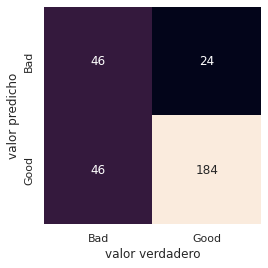

In [13]:
mat_t= confusion_matrix(y_test, y_pred_test)
mat_t

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

sns.heatmap(mat_t.T,square=True,annot=True,fmt='d',cbar=False,
           xticklabels=["Bad","Good"],
           yticklabels=["Bad","Good"])
plt.xlabel('valor verdadero')
plt.ylabel('valor predicho')
plt.show()